# SemEval 2023 Additional Plots

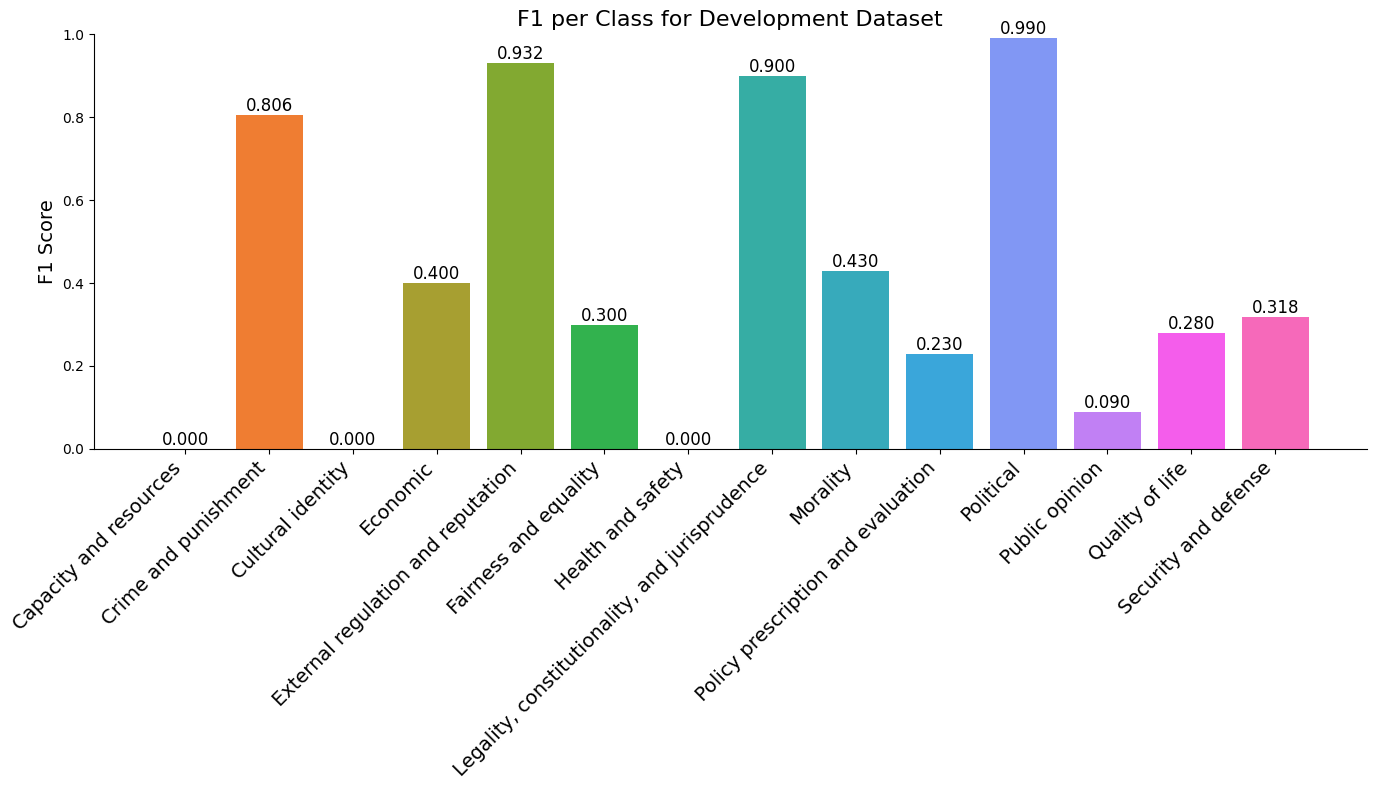

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
values = [0, 0.806, 0, 0.4, 0.932, 0.3, 0, 0.90, 0.43, 0.23, 0.99, 0.09, 0.28, 0.3181]

col_names = "Capacity_and_resources;Crime_and_punishment;Cultural_identity;Economic;External_regulation_and_reputation;Fairness_and_equality;Health_and_safety;Legality_Constitutionality_and_jurisprudence;Morality;Policy_prescription_and_evaluation;Political;Public_opinion;Quality_of_life;Security_and_defense"

labels = col_names.split(';')

frame_map = {
    "Capacity_and_resources": "Capacity and resources",
    "Crime_and_punishment": "Crime and punishment",
    "Cultural_identity": "Cultural identity",
    "Economic": "Economic",
    "External_regulation_and_reputation": "External regulation and reputation",
    "Fairness_and_equality": "Fairness and equality",
    "Health_and_safety": "Health and safety",
    "Legality_Constitutionality_and_jurisprudence": "Legality, constitutionality, and jurisprudence",
    "Morality": "Morality",
    "Policy_prescription_and_evaluation": "Policy prescription and evaluation",
    "Political": "Political",
    "Public_opinion": "Public opinion",
    "Quality_of_life": "Quality of life",
    "Security_and_defense": "Security and defense",
}

# Apply the frame_map to get better names
labels = [frame_map[label] for label in labels]

# Set the style and color palette
colors = sns.color_palette("husl", n_colors=len(labels))

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(labels, values, color=colors)

# Customize the plot
plt.title('F1 per Class for Development Dataset', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Test Classification Report

In [11]:
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None, names=['id', 'labels'])

    # make both cols as string
    df['id'] = df['id'].astype(str)
    df['labels'] = df['labels'].astype(str)

    return df

def process_labels(labels):
    return labels.apply(lambda x: x.split(','))

def create_multilabel_matrix(all_labels, label_lists):
    return np.array([[1 if label in label_list else 0 for label in all_labels] for label_list in label_lists])


In [12]:
# File paths
gold_file = '../../data/semeval/scorers/gold_label_task2.txt'
pred_file = '../../data/semeval/scorers/preds_spinning-umbrella-3887.txt'

# Read files
gold_df = read_file(gold_file)
pred_df = read_file(pred_file)

# Process labels
gold_labels = process_labels(gold_df['labels'])
pred_labels = process_labels(pred_df['labels'])

# Use the provided col_names to set the labels
col_names = "Capacity_and_resources;Crime_and_punishment;Cultural_identity;Economic;External_regulation_and_reputation;Fairness_and_equality;Health_and_safety;Legality_Constitutionality_and_jurisprudence;Morality;Policy_prescription_and_evaluation;Political;Public_opinion;Quality_of_life;Security_and_defense"
all_labels = col_names.split(';')

# Create multi-label matrices
y_true = create_multilabel_matrix(all_labels, gold_labels)
y_pred = create_multilabel_matrix(all_labels, pred_labels)

# Generate classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=all_labels, zero_division=0, output_dict=True)

# Print the report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=all_labels, zero_division=0))

Classification Report:
                                              precision    recall  f1-score   support

                      Capacity_and_resources       0.25      0.50      0.33         2
                        Crime_and_punishment       0.35      0.55      0.43        11
                           Cultural_identity       0.00      0.00      0.00         0
                                    Economic       0.25      1.00      0.40         2
          External_regulation_and_reputation       0.60      1.00      0.75        18
                       Fairness_and_equality       0.00      0.00      0.00         3
                           Health_and_safety       0.10      1.00      0.18         1
Legality_Constitutionality_and_jurisprudence       0.46      0.68      0.55        19
                                    Morality       0.21      1.00      0.35         6
          Policy_prescription_and_evaluation       0.00      0.00      0.00         4
                              

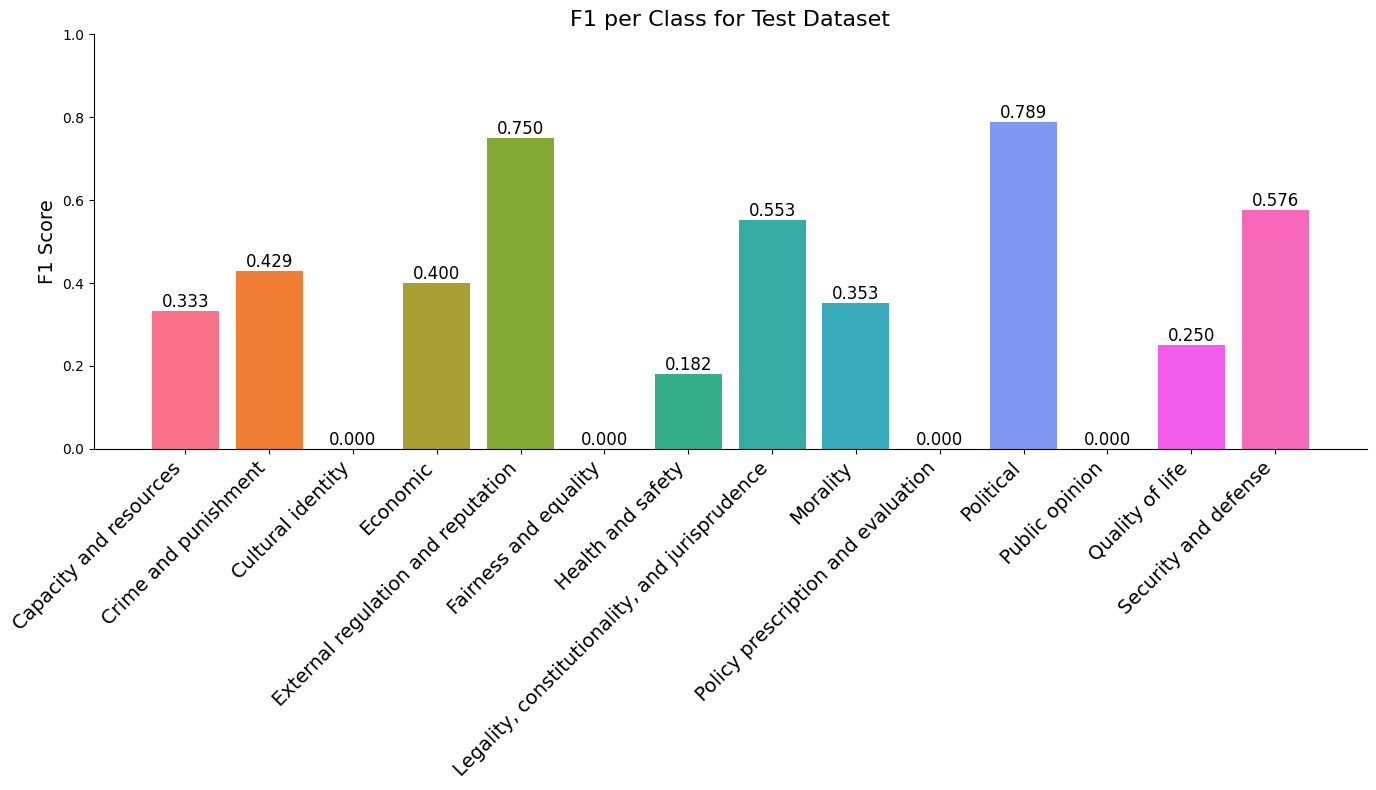

In [13]:
# Extract F1 scores
values = [report_dict[label]['f1-score'] for label in all_labels]

# Define the frame map
frame_map = {
    "Capacity_and_resources": "Capacity and resources",
    "Crime_and_punishment": "Crime and punishment",
    "Cultural_identity": "Cultural identity",
    "Economic": "Economic",
    "External_regulation_and_reputation": "External regulation and reputation",
    "Fairness_and_equality": "Fairness and equality",
    "Health_and_safety": "Health and safety",
    "Legality_Constitutionality_and_jurisprudence": "Legality, constitutionality, and jurisprudence",
    "Morality": "Morality",
    "Policy_prescription_and_evaluation": "Policy prescription and evaluation",
    "Political": "Political",
    "Public_opinion": "Public opinion",
    "Quality_of_life": "Quality of life",
    "Security_and_defense": "Security and defense",
}

# Apply the frame_map to get better names
labels = [frame_map[label] for label in all_labels]

# Set the style and color palette
colors = sns.color_palette("husl", n_colors=len(labels))

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.bar(labels, values, color=colors)

# Customize the plot
plt.title('F1 per Class for Test Dataset', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()